#Part 1: Data Preprocessing

Dataset:https://www.kaggle.com/datasets/akram24/restaurant-reviews

## Importing Libraries and Datasets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
data_to_load = files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [8]:
dataset=pd.read_csv('/content/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

# quoting=3: we have many double quotes within the text, we have to ignore these double quotes
# it can lead to an execution error

# Data Exploration

In [ ]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
dataset.shape

(1000, 2)

In [ ]:
# check the columns
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
# check the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# statistical summary
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with Missing Values

In [ ]:
dataset.isnull().values.any()

False

## Countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

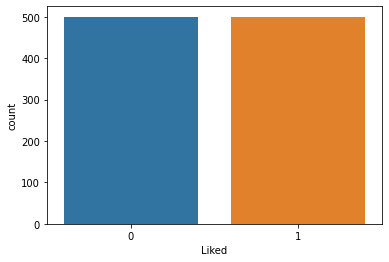

In [ ]:
sns.countplot(dataset['Liked'])

In [ ]:
# Sum of Positive Reviews
(dataset.Liked==1).sum()

500

In [ ]:
# Sum of Negative Reviews
(dataset.Liked==0).sum()

500

## Length of Review Message

In [ ]:
# Adds a column named Length and len function is used to find the length of each review message
dataset['Length']=dataset['Review'].apply(len)

In [ ]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

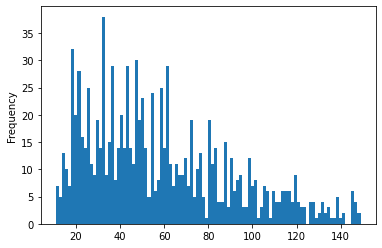

In [ ]:
# histogram for the column length

dataset['Length'].plot(bins=100,kind='hist')

In [ ]:
# the statistical summary for Length

dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [ ]:
# Longest Review Message

dataset[dataset['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [ ]:
# Shortest Review Message

dataset[dataset['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

In [ ]:
# Declare 2 variables
 
positive=dataset[dataset['Liked']==1]
negative=dataset[dataset['Liked']==0]

In [ ]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [ ]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [ ]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


## Cleaning the Review Text Messages

In [1]:
# import the libraries needed for cleansing the text
import re                                         # regular expressions
import nltk                                       # natural language processing library
nltk.download('stopwords')
from nltk.corpus import stopwords                 # import the downloaded stopwords            
from nltk.stem.porter import PorterStemmer        # we will use PorterStemmer class to apply the stemming on reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
corpus = []     # this list will contain all the cleaned reviews from our dataset

for i in range(0,1000):
  review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  # sub function: it can replace anything with anything that we want
  # we will keep only english letters, remaining all will be replaced by space (' ') 
  # ^ means not
  # dataset['Review'][i]: selecting the column review from the dataset
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  # stem the words which are not the stopwards
  review = ' '.join(review)
  corpus.append(review)

In [27]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [28]:
len(corpus)

1000

## Creating the Bag of Words Model

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
cv = CountVectorizer(max_features=1500)

In [32]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [41]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1]

In [42]:
x.shape

(1000, 1500)

In [37]:
y.shape

(1000,)

## Splitting the Dataset

In [43]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
x_train.shape

(800, 1500)

In [52]:
y_train.shape

(800,)

In [53]:
x_test.shape

(200, 1500)

In [54]:
y_test.shape

(200,)

# Part 2: Model Building

## Naive Bayes Classification

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [59]:
y_pred =  nb.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

75.0


In [62]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[54 41]
 [ 9 96]]


## XGBoost Classification

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [64]:
y_pred = xgb.predict(x_test)

In [65]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

78.0


In [66]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[88  7]
 [37 68]]


# Part 3: Final Model(XGBoost Classification)

In [68]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier()

In [69]:
y_pred = classifier.predict(x_test)

In [70]:
acc = accuracy_score(y_test,y_pred)
print(acc*100)

78.0


In [71]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[88  7]
 [37 68]]


# Part 4: Prediction for each Review

## Positive Review : "I love this restaurant so much"

In [72]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[1]


## Negative Review : "I hate this restaurant so much"

In [73]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_x_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_x_test)
print(new_y_pred)

[0]
